[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-regression-baseline-02.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [4]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [5]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [7]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
(df["Insulin"] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [8]:
# train 세트를 만듭니다.

train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [9]:
# test 세트를 만듭니다.

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

## EDA

D:\Installation\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

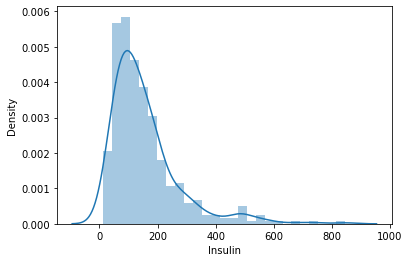

In [10]:
sns.distplot(train["Insulin"])

D:\Installation\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

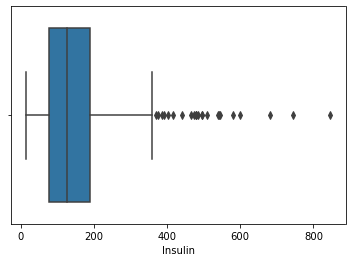

In [11]:
sns.boxplot(train["Insulin"])

In [12]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [13]:
# IQR =  3IQR - 1IQR
# OUT > 3IQR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [14]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [15]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(394, 9)


(370, 9)


## 학습, 예측에 사용할 컬럼

In [16]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 정답값이자 예측해야 될 값

In [17]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Insulin"
label_name

'Insulin'

## 학습, 예측 데이터셋 만들기

In [18]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
X_train.shape

(370, 8)

In [19]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(370,)

In [20]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [21]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42), 
         RandomForestRegressor(random_state=42),
         GradientBoostingRegressor(random_state=42)
        ]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [23]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([20, 22, 10, 22, 13, 11, 17, 13, 13,  9])

In [24]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.45468987, 0.42448912, 0.76115314, 0.59617299, 0.92272553,
       0.75501734, 0.3944473 , 0.55616013, 0.92257011, 0.3888824 ])

In [35]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [66]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []
    
    max_depth = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)

    param_distributions = {"max_depth": max_depth, "max_features": max_features }

    regressor = RandomizedSearchCV(
        estimator,
        param_distributions,
        n_iter=10,
        scoring=None,
        n_jobs=None,
        cv=5,
        verbose=1,
        random_state=42
    )
    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [38]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.8895374252312258, 'max_dept...","DecisionTreeRegressor(max_depth=29, max_featur...",-0.111442,"{'mean_fit_time': [0.006468629837036133, 0.008..."
1,RandomForestRegressor,"{'max_features': 0.5316493677247165, 'max_dept...","(DecisionTreeRegressor(max_depth=5, max_featur...",0.349482,"{'mean_fit_time': [0.35738520622253417, 0.2800..."
2,GradientBoostingRegressor,"{'max_features': 0.4549042676885703, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.291542,"{'mean_fit_time': [0.16428685188293457, 0.1743..."


RandomForest에서 가장 준수한 성능을 보이고 있다

In [41]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(max_depth=5, max_features=0.5316493677247165,
                      random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [42]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=0.5316493677247165,
                      random_state=42)

## cross validation 으로 학습 세트의 오차 측정하기

In [44]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s finished


array([ 60.01847682, 174.41794559,  93.9531417 , 150.70054773,
       168.44868131])

D:\Installation\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predict')

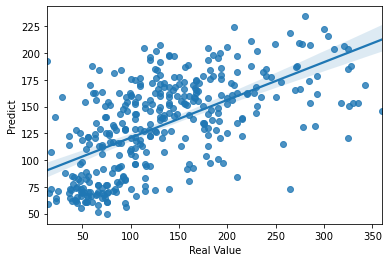

In [47]:
# regplot 으로 결과 값을 비교합니다.

sns.regplot(y_train, y_predict)
plt.xlabel("Real Value")
plt.ylabel("Predict")

In [48]:
# r2_score 를 구합니다.

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.3623859554444755

## 오차 구하기

In [50]:
# MAE
# 86
# 77.55
# 62.05
# 44.153 - RandomSearchCV
error = abs(y_train - y_predict)
error.mean()

44.15256544552137

D:\Installation\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Error')

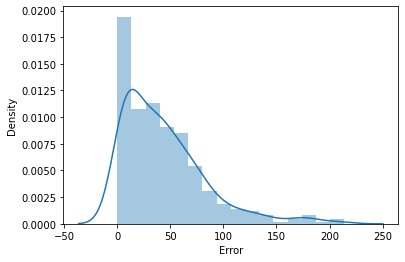

In [54]:
sns.distplot(error)
plt.xlabel("Error")

In [56]:
error.describe()

count    370.000000
mean      44.152565
std       39.545240
min        0.059333
25%       12.442969
50%       36.215707
75%       61.449185
max      213.850776
Name: Insulin, dtype: float64

In [57]:
# RMSE
# 126.895
# 114.077 (Insulin<600)
# 84
# 59.24
np.sqrt(((y_train - y_predict) ** 2).mean())

59.237222291807456

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.
* 피처의 중요도를 구합니다.

In [58]:
# 피처의 중요도를 추출하기
best_estimator.feature_importances_

array([0.03121576, 0.51549481, 0.03657361, 0.07915462, 0.11312651,
       0.06912435, 0.08991695, 0.06539339])

<AxesSubplot:>

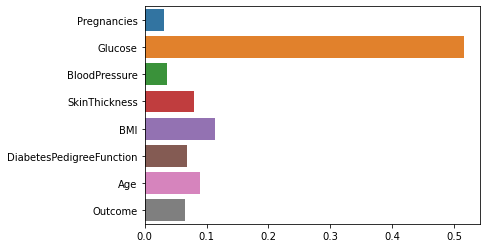

In [59]:
# 피처의 중요도 시각화 하기
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [60]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([184.85590414,  66.15999115, 194.15117544, 158.60908725,
       164.56948294])

In [61]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [62]:
test["Insulin"] = y_test

In [63]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.874576,42.087694,58.613779,95.707791,137.374367,169.646622,224.286953
1,138.0,173.230519,24.666723,99.071997,158.867555,175.247803,189.651781,230.234639


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

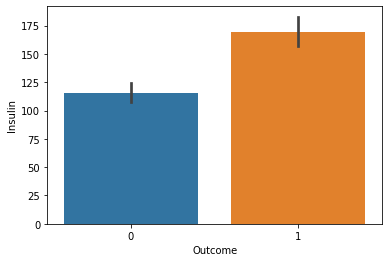

In [64]:
# Insulin 평균값을 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

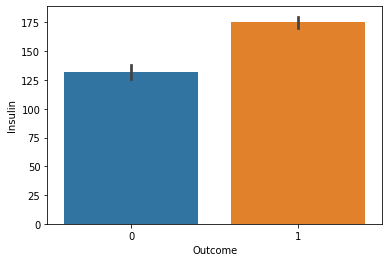

In [90]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")

## 예측값을 CSV 파일로 저장하기
* 랜덤값을 넣어서 최적의 파라메터를 찾았기 때문에 예측한 Insulin 값이 영상과 다를 수 있습니다.

In [67]:
df.loc[df['Insulin'] == 0, "Insulin"]

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [68]:
test["Insulin"]

0      184.855904
1       66.159991
2      194.151175
5      158.609087
7      164.569483
          ...    
761    191.959619
762     98.093062
764    158.864719
766    173.264307
767     80.082140
Name: Insulin, Length: 374, dtype: float64

In [69]:
df.loc[df['Insulin'] == 0, "Insulin"]  = test["Insulin"]

In [70]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,184.855904,33.6,0.627,50,1
1,1,85,66,29,66.159991,26.6,0.351,31,0
2,8,183,64,0,194.151175,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,158.864719,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,173.264307,30.1,0.349,47,1


In [73]:
df.to_csv("data/diabetes_fill_insulin.csv", index=False)

In [74]:
pd.read_csv("data/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,184.855904,33.6,0.627,50,1
1,1,85,66,29,66.159991,26.6,0.351,31,0
2,8,183,64,0,194.151175,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,158.864719,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,173.264307,30.1,0.349,47,1
